In [43]:
from sympy import *
from IPython.display import display

x, omega, y0, C1 = symbols("x omega y0 C1")
g = symbols("g", positive=True)
display(x, g, omega, y0, C1)

x

g

omega

y0

C1

In [38]:
ode_rhs = omega ** 2 * x / g
display(ode_rhs)


omega**2*x/g

In [39]:
dsol = integrate(ode_rhs, x) + C1
display(dsol)

C1 + omega**2*x**2/(2*g)

In [41]:
eq1 = Eq(dsol.subs(x, 0), y0)
display(eq1)

Eq(C1, y0)

In [42]:
sol1 = solveset(eq1, C1)
display(sol1)

{y0}

In [44]:
C2 = tuple(sol1)[0]
display(C2)

y0

In [46]:
dsol_y0 = dsol.subs(C1, C2)
display(dsol_y0)

y0 + omega**2*x**2/(2*g)

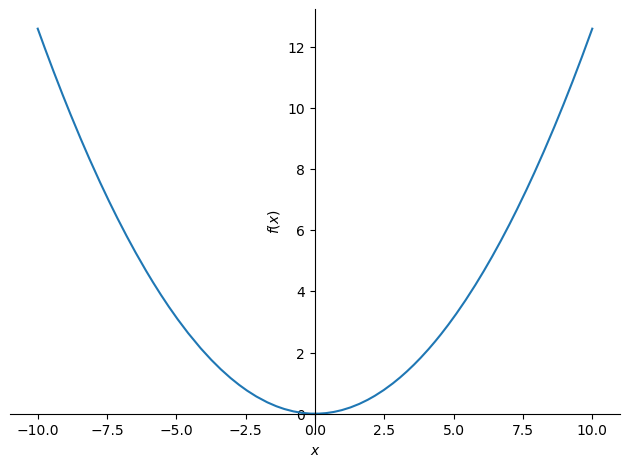

In [47]:
ds = dsol_y0.subs({y0: 0, omega: pi/2, g: 9.8})
p1 = plot(ds)

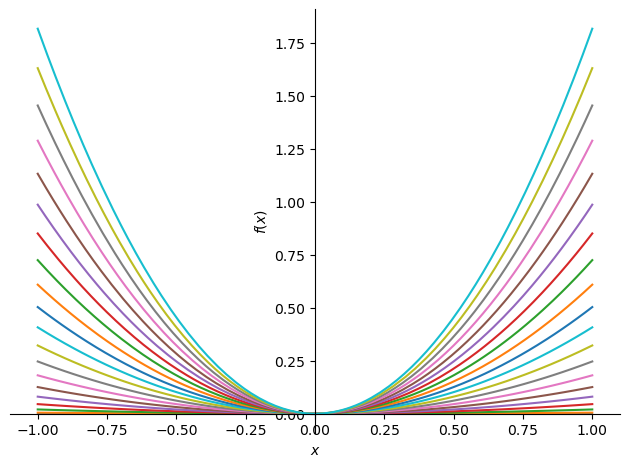

In [48]:
from numpy import arange
p2 = plot(show = False)
for om in arange(0, 2 * pi, pi / 10):
    ds = dsol_y0.subs({y0:0, omega: om, g: 9.8})
    p = plot(ds, (x, -1, 1), show = False)
    p2.extend(p)
p2.show()

In [49]:
V0, R = symbols("V0 R", positive = True)
vol = 2 * pi * integrate(dsol_y0 * x, (x, 0, R))
display(vol)


2*pi*(R**4*omega**2/(8*g) + R**2*y0/2)

In [50]:
eq2 = Eq(vol, V0)
display(eq2)

Eq(2*pi*(R**4*omega**2/(8*g) + R**2*y0/2), V0)

In [51]:
sol2 = solveset(eq2, y0)
display(sol2)

{-(R**4*omega**2/g - 4*V0/pi)/(4*R**2)}

In [52]:
y1 = simplify(tuple(sol2)[0])
display(y1)

-R**2*omega**2/(4*g) + V0/(pi*R**2)

In [53]:
dsol_V0 = dsol_y0.subs(y0, y1)
display(dsol_V0)

-R**2*omega**2/(4*g) + omega**2*x**2/(2*g) + V0/(pi*R**2)

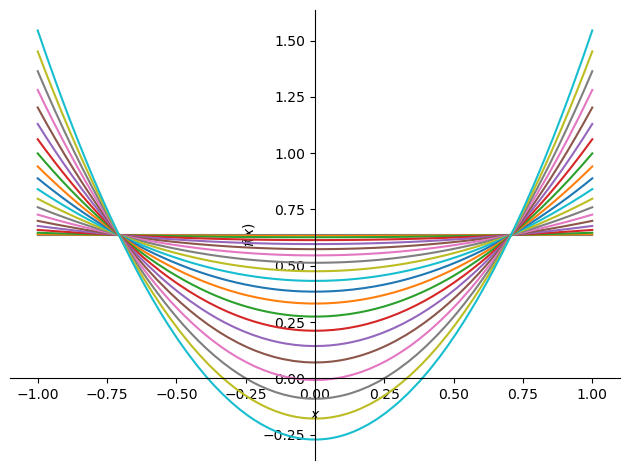

In [54]:
p3 = plot(show = False)
for om in arange(0, 2 * pi, pi / 10):
    ds = dsol_V0.subs({V0:2, R:1, omega:om, g:9.8})
    p = plot(ds, (x, -1, 1), show = False)
    p3.extend(p)
p3.show()

In [55]:
eq3 = Eq(dsol_V0.subs(x, 0), 0)
sol3 = solveset(eq3, omega)
display(sol3)


{-2*sqrt(V0)*sqrt(g)/(sqrt(pi)*R**2), 2*sqrt(V0)*sqrt(g)/(sqrt(pi)*R**2)}

In [56]:
omega0 = tuple(sol3)[1]
display(omega0)

2*sqrt(V0)*sqrt(g)/(sqrt(pi)*R**2)

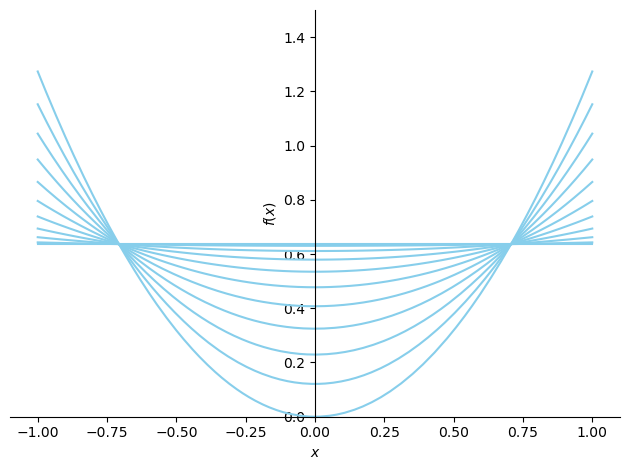

In [57]:
p4 = plot(ylim = (0, 1.5), show = False)
par = {V0: 2, omega: 0, R: 1, g: 9.8}
om0 = omega0.subs(par)
for om in arange(0, 1.1 * om0, 0.1 * om0):
    par[omega] = om
    ds = dsol_V0.subs(par)
    p = plot(ds, (x, -1, 1), line_color = "skyblue", 
            show = False)
    p4.extend(p)
p4.show()

In [58]:
eq4 = Eq(dsol_y0, 0)
sol4 = solveset(eq4, x)
display(sol4)



{-sqrt(2)*sqrt(g)*sqrt(-y0)/omega, sqrt(2)*sqrt(g)*sqrt(-y0)/omega}

In [61]:

x0 = tuple(sol4)[0]
display(x0)

sqrt(2)*sqrt(g)*sqrt(-y0)/omega

In [62]:
vol1 = 2 * pi * integrate(dsol_y0 * x, (x, x0, R))
display(vol1)

2*pi*(R**4*omega**2/(8*g) + R**2*y0/2 + g*y0**2/(2*omega**2))

In [64]:

eq5 = Eq(vol1, V0)
sol5 = solveset(eq5, y0)
display(sol5)


{-R**2*omega**2/(2*g) - sqrt(V0)*omega/(sqrt(pi)*sqrt(g)), -R**2*omega**2/(2*g) + sqrt(V0)*omega/(sqrt(pi)*sqrt(g))}

In [65]:

for s in tuple(sol5):
    display(s.subs(omega, omega0))

0

-4*V0/(pi*R**2)

In [33]:
y2 = tuple(sol5)[0]
dsol_sup = dsol_y0.subs(y0, y2)
display(dsol_sup)


-R**2*omega**2/(2*g) + sqrt(V0)*omega/(sqrt(pi)*sqrt(g)) + omega**2*x**2/(2*g)

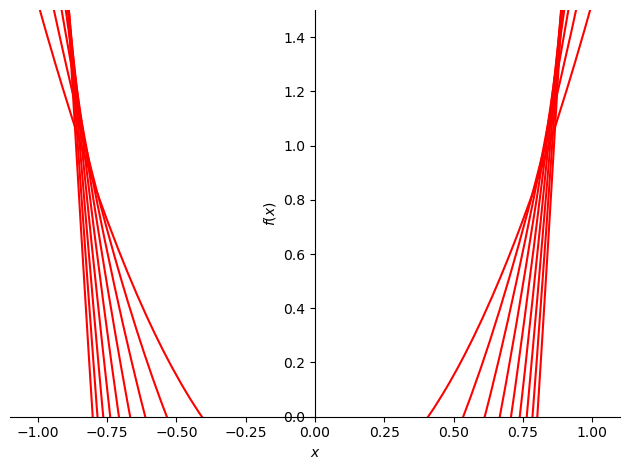

In [35]:
p5 = plot(ylim = (0, 1.5), show = False)
for om in arange(1.2 * om, 3 * om0, 0.2 * om0):
    par[omega] = om
    ds = dsol_sup.subs(par)
    p = plot(ds, (x, -1, 1), line_color = "red",
            show = False)
    p5.extend(p)
p5.show()

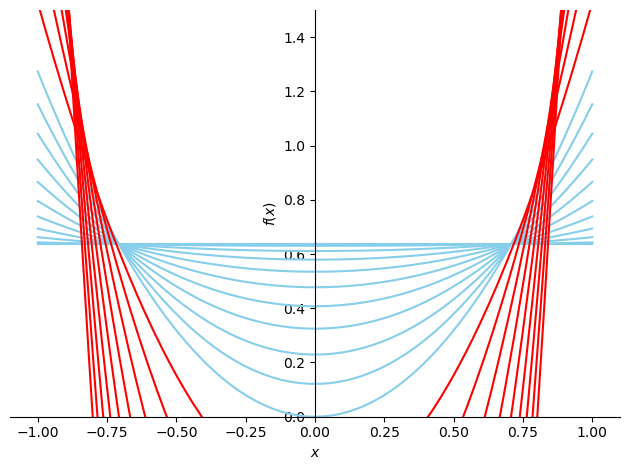

In [37]:
p6 = plot(ylim = (0, 1.5), show = False)
p6.extend(p4)
p6.extend(p5)
p6.show()